In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward, linkage
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

# 군집 알고리즘 비교와 평가

### 타겟값으로 군집 평가

 ARI/ NMI : 군집이 최적일 때 점수 1로 주고, 무작위로 분류된 군집이라면 점수를 0으로, 0-1사이 값으로 리턴

** ARI의 경우 점수가 음수로 나올수도 있음

In [35]:
from sklearn.metrics.cluster import adjusted_rand_score

In [36]:
x, y = make_moons(n_samples= 200, noise=0.05, random_state=0)

In [37]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [48]:
# 군집분석 알고리즘 모델 리스트 만들기
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

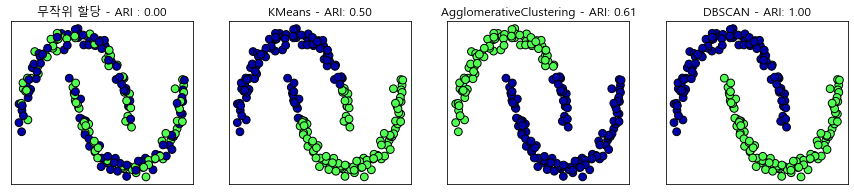

In [39]:
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                         subplot_kw={'xticks':(),'yticks':()})

#군집분석 알고리즘 들과 비교를 위해서 무작위로 클러스터 할당한 것
random_state =np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size =(len(x_scaled)))

# 무작위로 할당한 클러스터 시각화
axes[0].scatter(x_scaled[:,0],x_scaled[:,1], c= random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI : {:.2f}'.format(adjusted_rand_score(y, random_clusters)))

# 군집분석 알고리즘 리스트에 대한 시각화

for ax, algorithms in zip(axes[1:], algorithms):
    clusters = algorithms.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:, 1], c= clusters, 
               cmap= mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} - ARI: {:.2f}'.format(algorithms.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))
plt.show()


In [40]:
from sklearn.metrics import accuracy_score

# 
cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]

In [41]:
print('정확도: {:.2f}'.format(accuracy_score(cluster1, cluster2)))

정확도: 0.00


In [42]:
print('ARI : {:.2f}'.format(adjusted_rand_score(cluster1,cluster2)))

ARI : 1.00


- 군집분석에서는 Accuracy를 사용하면 안된다.

- ARI 나 NMI를 사용해야 함

#### 실루엣 지수
- 이 지표는 정확하지 않은 점수
- 클러스터의 밀집정도를 계산하는 값
- 점수가 높을수록 좋고, 최대 점수는 1점
- 데이터가 복잡하게 생겼을 때는 밀집도를 활용한 점수가 부정확함
-  -1 일때 완전 잘못된 군짐, 0 = 중첩된 군집, 1= 잘 구분된 군집

In [43]:
from sklearn.metrics.cluster import silhouette_score

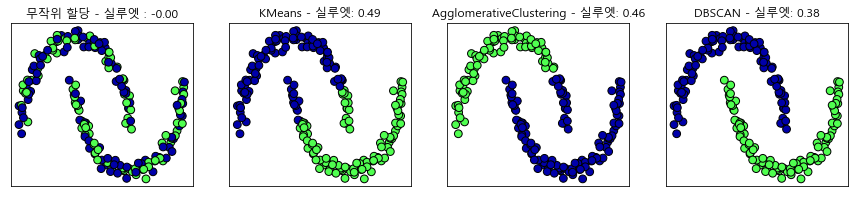

In [49]:
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                         subplot_kw={'xticks':(),'yticks':()})

#군집분석 알고리즘 들과 비교를 위해서 무작위로 클러스터 할당한 것
random_state =np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size =(len(x_scaled)))

# 무작위로 할당한 클러스터 시각화
axes[0].scatter(x_scaled[:,0],x_scaled[:,1], c= random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - 실루엣 : {:.2f}'.format(silhouette_score(x_scaled, random_clusters)))

# 군집분석 알고리즘 리스트에 대한 시각화

for ax, algorithms in zip(axes[1:], algorithms):
    clusters = algorithms.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:, 1], c= clusters, 
               cmap= mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} - 실루엣: {:.2f}'.format(algorithms.__class__.__name__,
                                           silhouette_score(x_scaled, clusters)))
plt.show()


군집모델이 안정적이거나 실루엣 점수가 높다고 하더라도, 군집에 어떤 유의미한 것이 있는지, 군집이 데이터의 흥미로운 feature를 반영하고 있는지 알 수 없음

- 실루엣은 잘 작동하지 않기 때문에, ARI 점수를 사용하자